In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

Text(0.5,0,'Z')

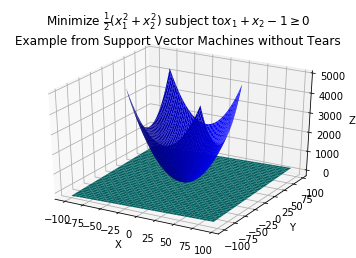

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Minimize $\\frac{1}{2} (x_1^2 + x_2^2)$ subject to$x_1 + x_2 - 1 \\geq 0$' '\n'
             'Example from Support Vector Machines without Tears')

X = np.arange(-50, 50, 2)
Y = np.arange(-50, 50, 1)
X, Y = np.meshgrid(X, Y)
Z = X**2+Y**2

ax.plot_surface(X, Y, Z, color='b')

X = np.arange(-100, 100, 5)
Y = np.arange(-100, 100, 5)
X, Y = np.meshgrid(X, Y)
Z = X+Y-1

ax.plot_surface(X, Y, Z, color='c')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [12]:
from scipy import optimize

In [19]:
x0 = np.random.randn(2)

# F = (1/2)*x*x.T
def loss(x, sign=1.):
    return sign * (0.5 * np.dot(x, x.T))

# F' = x
def jac(x, sign=1.):
    return x

# Ax - b >= 0
A, b = np.array([[1, 1]]), np.array([1])
cons = { 'type': 'ineq',
         'fun': lambda x: np.dot(A, x) - b,
         'jac': lambda x: A}

opt = {'disp': False}

res = optimize.minimize(loss, x0, jac=jac, constraints=cons, method='SLSQP', options=opt)
res

     fun: 0.2499999999999999
     jac: array([0.5, 0.5])
 message: 'Optimization terminated successfully.'
    nfev: 2
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.5, 0.5])